In [1]:
import time
import os
import re
import datetime
import glob

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import japanize_matplotlib
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# ディビジョンを日本語に
def div_ja(division):
    sex = '男子' if division[-1]=='m' else '女子'
    return 'V{0}{1}'.format(division[1], sex)

# ex = ''
# index = [
#     'AA', 'AP', 'AE', 'ASucc%', 'AP/S', 'BAA', 'BAP', 'BAE', 'BASucc%',
#     'BP', 'BP/S', 'SVA', 'SVP', 'SVE', 'SVx', 'SVEff%', 'RA', 'Rx', 'Rg','RSucc%'
# ]

# アテンプト数を削除
ex = '_remove_A'
index = [
    'AA', 'AP', 'AE', 'ASucc%', 'AP/S', 'BAA', 'BAP', 'BAE', 'BASucc%',
    'BP', 'BP/S', 'SVP', 'SVE', 'SVx', 'SVEff%', 'Rx', 'Rg','RSucc%'
]

# 主要スタッツのみ
# ex = '_simple1'
# index = [
#     'ASucc%', 'BASucc%', 'BP/S', 'SVEff%', 'RSucc%'
# ]

In [2]:
division = 'v2_m'
paths = glob.glob('database/{}/teamdb_*'.format(division))
paths = paths[-5:]
print(paths)

['database/v2_m\\teamdb_2017-18_regular.csv', 'database/v2_m\\teamdb_2018-19_regular.csv', 'database/v2_m\\teamdb_2019-20_regular.csv', 'database/v2_m\\teamdb_2020-21_regular.csv', 'database/v2_m\\teamdb_2021-22_regular.csv']


In [4]:
df_list = []
for path in paths:
    df_list.append(pd.read_csv(path))

all_df = pd.concat(df_list)
all_df.to_csv('{}_17-22.csv'.format(division))

In [185]:
df4 = pd.DataFrame(index=index)
for path in paths:
    # print(path[-14:-12])
    year = path[-14:-12]
    df = pd.read_csv(path)
    f = lambda x: 1 if x == 'Win' else 0
    df['Win'] = df['Win_Lose'].map(f)
    df2 = df[index].copy()
    # df2['BASucc%'].replace('-', np.nan, inplace=True)
    # df2['BASucc%'] = df2['BASucc%'].apply(lambda x: np.nan if x == '-' else x).astype(float)
    df2['BASucc%'] = df2['BASucc%'].apply(lambda x: 0 if x == '-' else x).astype(float)
    # df2['BASucc%'] =df2['BASucc%'].astype(float)
    df3 = df2.apply(lambda x: (x-x.mean())/x.std(), axis=0)
    X = df3 # 説明変数
    Y = df['Win']
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0) # 80%のデータを学習データに、20%を検証データにする

    lr = LogisticRegression() # ロジスティック回帰モデルのインスタンスを作成
    lr_ = lr.fit(X_train, Y_train) # ロジスティック回帰モデルの重みを学習
    Y_pred = lr.predict(X_test)
    print(accuracy_score(Y_test, Y_pred))
    # print(Y_test, Y_pred)
    df4[year] = lr.coef_[0]    
df4

0.8529411764705882
0.9090909090909091
0.8958333333333334
0.9090909090909091
0.9594594594594594


,18,19,20,21,22
AA,0.544211,0.539392,0.255863,0.396158,0.957421
AP,0.789770,1.045050,1.127122,0.834254,1.216984
AE,-0.527139,0.076433,-0.375129,0.213930,-0.284063
ASucc%,1.180915,1.022959,1.326729,0.865905,0.756324
AP/S,1.098561,0.216980,0.490667,0.773870,0.171304
BAA,0.352190,0.114448,-0.094009,-0.414768,0.276303
BAP,-0.830575,-0.261440,0.064179,-0.121951,-0.591805
BAE,0.012799,-0.190041,-0.173102,-0.020262,-0.101703
BASucc%,0.141029,0.071768,-0.104910,0.072698,0.179525
BP,0.084955,0.615398,1.129012,0.838849,0.611760


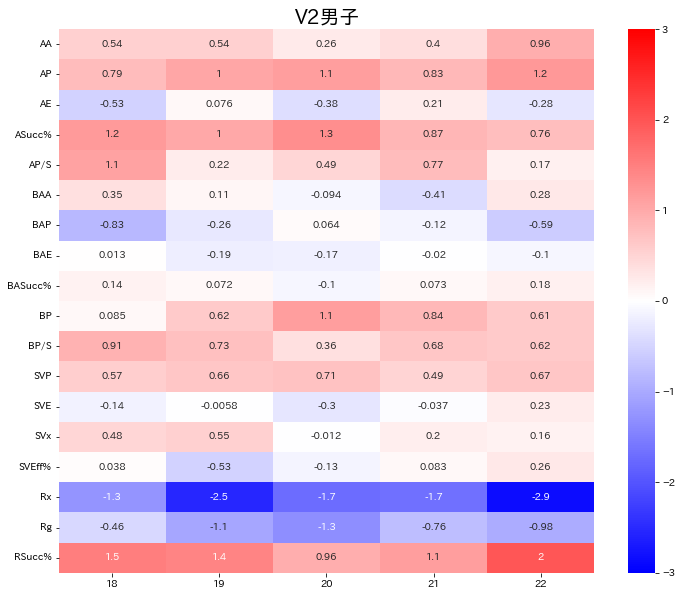

In [186]:
fig = plt.figure(figsize=(12,10))
plt.title(div_ja(division), fontsize=20)
sns.heatmap(df4,annot=True,cmap='bwr',vmin=-3,vmax=3)
plt.savefig('graph/hm/{0}{1}.png'.format(division,ex),facecolor='white')
plt.show()

In [187]:
df4 = pd.DataFrame(index=index)
teams = list(df['Team'].drop_duplicates())
# teams = teams[5:]
df = pd.read_csv(path)
f = lambda x: 1 if x == 'Win' else 0
for team in teams:
    print(team)
    try:
        team_df = df[df['Team']==team].copy()
        team_df['Win'] = team_df['Win_Lose'].map(f)
        df2 = team_df[index].copy()
        # df2['BASucc%'].replace('-', np.nan, inplace=True)
        # df2['BASucc%'] = df2['BASucc%'].apply(lambda x: np.nan if x == '-' else x).astype(float)
        df2['BASucc%'] = df2['BASucc%'].apply(lambda x: 0 if x == '-' else x).astype(float)
        # df2['BASucc%'] =df2['BASucc%'].astype(float)
        df3 = df2.apply(lambda x: (x-x.mean())/x.std(), axis=0)
        X = df3 # 説明変数
        Y = team_df['Win']
        X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0) # 80%のデータを学習データに、20%を検証データにする

        lr = LogisticRegression() # ロジスティック回帰モデルのインスタンスを作成
        lr_ = lr.fit(X_train, Y_train) # ロジスティック回帰モデルの重みを学習
        Y_pred = lr.predict(X_test)
        print(accuracy_score(Y_test, Y_pred))
        # print(Y_test, Y_pred)
        df4[team] = lr.coef_[0]
    except:
        print('勝利or敗北が1以下')
df4

警視庁フォートファイターズ
1.0
千葉ZELVA
1.0
トヨタ自動車サンホークス
0.5
奈良ドリーマーズ
0.6666666666666666
ヴォレアス北海道
勝利or敗北が1以下
埼玉アザレア
0.6
サフィルヴァ北海道
1.0
ヴィアティン三重
1.0
大同特殊鋼レッドスター
1.0
兵庫デルフィーノ
0.8
富士通カワサキレッドスピリッツ
0.8333333333333334
クボタスピアーズ
1.0
つくばユナイテッドSunGAIA
0.4
きんでんトリニティーブリッツ
0.8333333333333334
東京ヴェルディ
1.0


,警視庁フォートファイターズ,千葉ZELVA,トヨタ自動車サンホークス,奈良ドリーマーズ,埼玉アザレア,サフィルヴァ北海道,ヴィアティン三重,大同特殊鋼レッドスター,兵庫デルフィーノ,富士通カワサキレッドスピリッツ,クボタスピアーズ,つくばユナイテッドSunGAIA,きんでんトリニティーブリッツ,東京ヴェルディ
AA,-0.090515,-0.018626,-0.094231,0.023328,-0.179916,0.295534,0.128546,0.006210,0.188001,-0.051653,0.058316,0.131883,0.132305,0.124368
AP,0.415531,0.052871,0.321600,-0.003898,0.286966,0.588718,0.403770,-0.045735,0.421132,0.144239,0.330765,0.494203,0.401573,0.483036
AE,-0.146708,-0.661923,0.144626,-0.053272,-0.411032,0.209354,-0.090494,-0.685213,-0.364149,-0.139402,0.359581,-0.666395,0.155640,-0.108442
ASucc%,1.009834,0.181446,0.902957,0.343402,1.076481,0.491928,0.546383,0.105893,0.544961,0.523240,0.470802,0.056300,0.762791,0.651323
AP/S,0.451174,0.420792,0.990095,0.580782,0.160215,0.500368,0.681562,-0.084419,1.047984,0.619590,0.798200,0.550571,0.392062,0.464139
BAA,-0.512429,-0.451894,-0.392483,-0.029526,0.029813,0.088362,0.041820,-0.271046,-0.061772,0.017272,0.155080,-0.097788,-0.216364,-0.055937
BAP,-0.110291,-0.196620,-0.196574,-0.192549,-0.241350,0.458923,0.094578,-0.246470,0.118246,0.095755,0.031245,0.213674,0.114050,0.402243
BAE,0.116012,-0.091907,-0.061224,0.032663,-0.098511,-0.188034,-0.149545,-0.480558,0.294950,-0.514734,-0.061456,-0.391630,-0.551795,0.134907
BASucc%,-0.162003,0.284159,0.138359,0.161972,-0.710586,0.849129,0.266978,0.159248,0.286889,0.195592,-0.126820,0.649624,0.364805,0.554152
BP,0.649414,0.236034,0.105488,0.575667,0.042825,0.262977,-0.029181,0.448551,0.442198,0.397228,0.540218,-0.061039,0.340632,0.358904


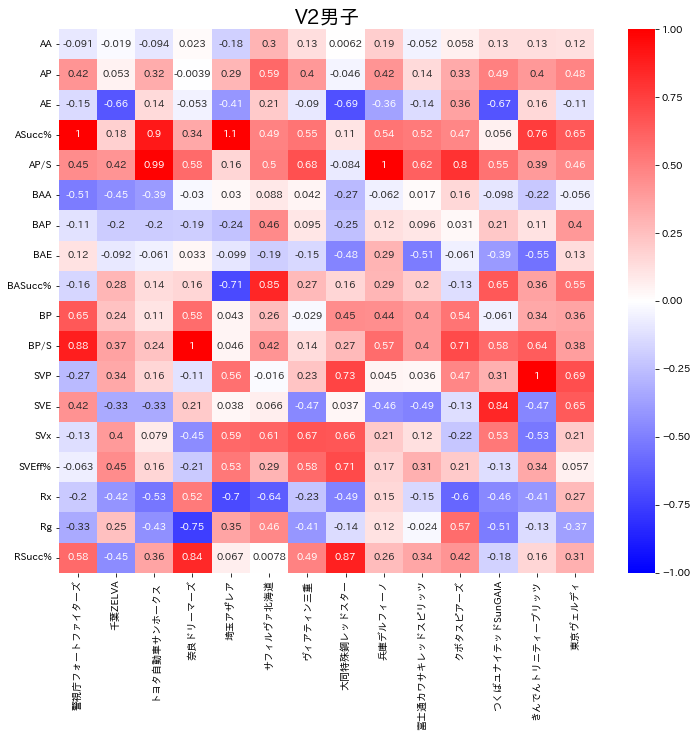

In [188]:
fig = plt.figure(figsize=(12,10))
plt.title(div_ja(division), fontsize=20)
sns.heatmap(df4,annot=True,cmap='bwr',vmin=-1,vmax=1)
plt.savefig('graph/hm/team/{0}_team{1}.png'.format(division,ex),facecolor='white')
plt.show()

In [158]:
df4

,警視庁フォートファイターズ,千葉ZELVA,トヨタ自動車サンホークス,奈良ドリーマーズ
AA,-0.090515,-0.018626,-0.094231,0.023328
AP,0.415531,0.052871,0.321600,-0.003898
AE,-0.146708,-0.661923,0.144626,-0.053272
ASucc%,1.009834,0.181446,0.902957,0.343402
AP/S,0.451174,0.420792,0.990095,0.580782
BAA,-0.512429,-0.451894,-0.392483,-0.029526
BAP,-0.110291,-0.196620,-0.196574,-0.192549
BAE,0.116012,-0.091907,-0.061224,0.032663
BASucc%,-0.162003,0.284159,0.138359,0.161972
BP,0.649414,0.236034,0.105488,0.575667


In [160]:
team_df

,AA,AP,AE,ASucc%,AP/S,BAA,BAP,BAE,BASucc%,BP,...,OpSVA,OpSVP,OpSVE,OpSVx,OpSVEff%,OpRA,OpRx,OpRg,OpRSucc%,Win
4,71,41,5,57.7,13.67,20,13,0,65.0,11,...,50,1,9,6,0.5,65,28.0,20.0,58.5,1
14,88,43,9,48.9,14.33,29,16,3,55.2,9,...,66,2,10,6,1.5,65,29.0,24.0,63.1,1
40,64,29,6,45.3,9.67,19,7,2,36.8,10,...,59,3,12,9,3.8,58,21.0,18.0,51.7,1
50,75,44,7,58.7,14.67,19,14,1,73.7,10,...,63,3,12,13,5.2,62,19.0,13.0,41.1,1
62,110,63,6,57.3,15.75,28,13,3,46.4,11,...,72,4,9,5,4.2,80,39.0,19.0,60.6,1
76,65,37,2,56.9,12.33,12,7,1,58.3,14,...,61,4,14,10,4.9,60,37.0,7.0,67.5,1
82,62,37,6,59.7,12.33,15,12,0,80.0,7,...,58,2,13,18,5.6,62,25.0,6.0,45.2,1
96,108,63,7,58.3,15.75,29,17,6,58.6,5,...,78,1,9,18,4.2,81,33.0,11.0,47.5,1
119,70,47,1,67.1,15.67,15,8,0,53.3,4,...,62,1,9,8,1.2,53,29.0,14.0,67.9,1
126,69,38,7,55.1,12.67,15,8,1,53.3,9,...,49,2,11,9,3.1,65,34.0,14.0,63.1,1


In [37]:
df4 = pd.DataFrame(index=index)
df5 = pd.DataFrame(index=['Score'])
teams = list(all_df['Team'].drop_duplicates())
# teams = teams[5:]
# df = pd.read_csv(path)
f = lambda x: 1 if x == 'Win' else 0
for team in teams:
    print(team)
    # try:
    team_df = all_df[all_df['Team']==team].copy()
    team_df['Win'] = team_df['Win_Lose'].map(f)
    df2 = team_df[index].copy()
    # df2['BASucc%'].replace('-', np.nan, inplace=True)
    # df2['BASucc%'] = df2['BASucc%'].apply(lambda x: np.nan if x == '-' else x).astype(float)
    df2['BASucc%'] = df2['BASucc%'].apply(lambda x: 0 if x == '-' else x).astype(float)
    # df2['BASucc%'] =df2['BASucc%'].astype(float)
    df3 = df2.apply(lambda x: (x-x.mean())/x.std(), axis=0)
    X = df3 # 説明変数
    Y = team_df['Win']
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0) # 80%のデータを学習データに、20%を検証データにする

    lr = LogisticRegression() # ロジスティック回帰モデルのインスタンスを作成
    lr_ = lr.fit(X_train, Y_train) # ロジスティック回帰モデルの重みを学習
    Y_pred = lr.predict(X_test)
    score = accuracy_score(Y_test, Y_pred)
    print(score)
    df5[team] = score
    # print(Y_test, Y_pred)
    df4[team] = lr.coef_[0]
    # except:
        # print('勝利or敗北が1以下')
df4

大同特殊鋼レッドスター
0.8
警視庁フォートファイターズ
0.7894736842105263
VC長野トライデンツ
0.6
つくばユナイテッドSunGAIA
0.8095238095238095
富士通カワサキレッドスピリッツ
0.8095238095238095
埼玉アザレア
0.9
大分三好ヴァイセアドラー
0.6
トヨタ自動車サンホークス
1.0
長野GaRons
1.0
東京ヴェルディ
0.8125
きんでんトリニティーブリッツ
0.8125
ヴォレアス北海道
0.9166666666666666
兵庫デルフィーノ
1.0
ヴィアティン三重
0.9090909090909091
サフィルヴァ北海道
0.8571428571428571
千葉ZELVA
1.0
奈良ドリーマーズ
0.6666666666666666
クボタスピアーズ
1.0


,大同特殊鋼レッドスター,警視庁フォートファイターズ,VC長野トライデンツ,つくばユナイテッドSunGAIA,富士通カワサキレッドスピリッツ,埼玉アザレア,大分三好ヴァイセアドラー,トヨタ自動車サンホークス,長野GaRons,東京ヴェルディ,きんでんトリニティーブリッツ,ヴォレアス北海道,兵庫デルフィーノ,ヴィアティン三重,サフィルヴァ北海道,千葉ZELVA,奈良ドリーマーズ,クボタスピアーズ
AA,0.012782,0.276077,0.090891,0.711208,-0.350441,0.024736,0.032025,0.021338,-0.155320,0.762316,0.055344,-0.304549,0.233984,0.402678,0.208648,-0.018626,0.023328,0.058316
AP,0.710751,0.536479,0.501928,0.969999,-0.203341,0.792249,0.163783,0.309789,0.358364,0.832323,0.663130,-0.174954,0.579321,0.500091,0.666249,0.052871,-0.003898,0.330765
AE,-0.570813,-0.105776,-0.224701,-0.734381,-0.070032,-0.578784,-0.462942,-0.002890,-0.115093,-0.111064,-0.607498,0.156031,-0.095366,-0.493051,0.037060,-0.661923,-0.053272,0.359581
ASucc%,1.188152,0.410721,0.833717,0.455571,0.630460,1.169908,0.184875,0.862055,1.094267,0.352311,0.945117,0.289420,0.636488,0.500357,0.870889,0.181446,0.343402,0.470802
AP/S,0.763406,0.406599,0.667106,0.200941,1.240468,0.065955,0.568040,0.334950,0.098749,0.098237,0.028485,0.089546,1.142610,0.885521,0.260204,0.420792,0.580782,0.798200
BAA,-0.222274,-0.460424,0.032006,-0.361206,0.305357,0.344762,-0.466331,-0.655537,0.111540,-0.360908,0.350704,-0.574583,0.003078,-0.584792,-0.042883,-0.451894,-0.029526,0.155080
BAP,-0.193213,0.503623,-0.149908,0.341496,-0.184977,-0.618385,-0.402919,-0.031342,0.333886,-0.113113,-0.128823,-0.424999,-0.088258,0.235844,0.465778,-0.196620,-0.192549,0.031245
BAE,-0.496856,-0.663901,-0.119686,-0.812429,-0.572777,0.582124,0.530818,0.257134,-0.651641,0.016943,-0.035329,-0.565015,0.165533,-0.384894,-0.336078,-0.091907,0.032663,-0.061456
BASucc%,0.096289,0.033644,-0.189925,0.075721,-0.513034,-0.061865,0.142632,0.033676,0.173351,0.481400,0.089068,0.045464,-0.002188,0.726760,0.578083,0.284159,0.161972,-0.126820
BP,0.823048,0.082955,-0.026447,0.254013,0.273759,0.782315,-0.134808,0.064972,0.963217,1.083921,1.141328,-0.225872,0.665654,0.636891,0.373018,0.236034,0.575667,0.540218


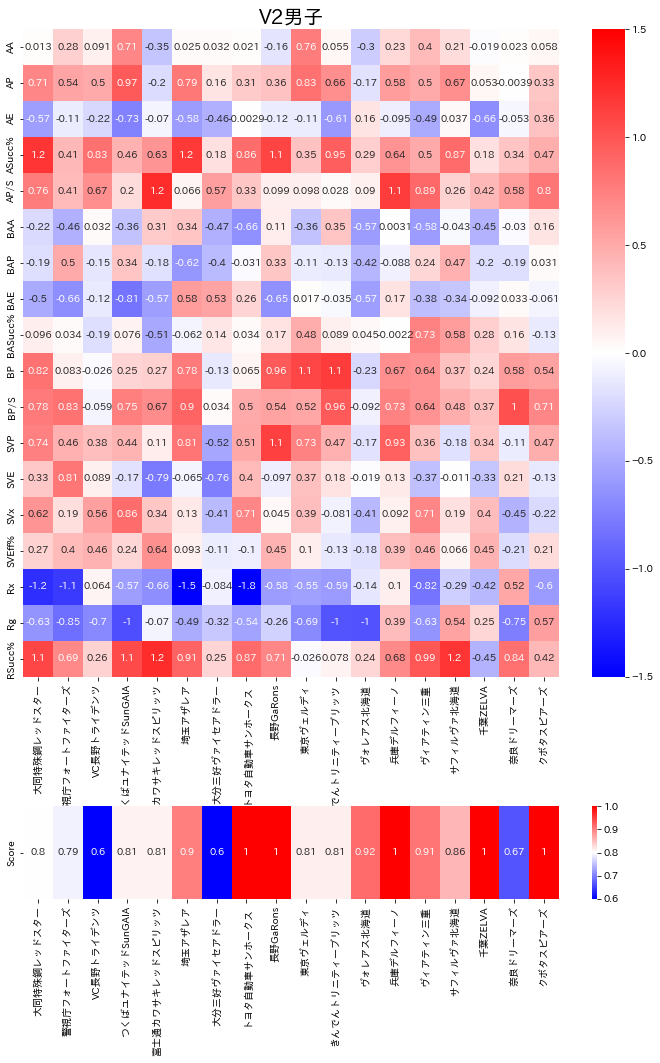

In [38]:
fig = plt.figure(figsize=(12,16))
grid = plt.GridSpec(8,1)
ax1 = fig.add_subplot(grid[0:6,0])
ax2 = fig.add_subplot(grid[7,0])
ax1.set_title(div_ja(division), fontsize=20)
sns.heatmap(df4,annot=True,cmap='bwr',vmin=-1.5,vmax=1.5,ax=ax1)
sns.heatmap(df5,annot=True,cmap='bwr',vmin=0.6,vmax=1,ax=ax2)
plt.savefig('graph/hm/team/{0}_team{1}_17-22.png'.format(division,ex),facecolor='white')
plt.show()

In [27]:
df5

,大同特殊鋼レッドスター,警視庁フォートファイターズ,VC長野トライデンツ,つくばユナイテッドSunGAIA,富士通カワサキレッドスピリッツ,埼玉アザレア,大分三好ヴァイセアドラー,トヨタ自動車サンホークス,長野GaRons,東京ヴェルディ,きんでんトリニティーブリッツ,ヴォレアス北海道,兵庫デルフィーノ,ヴィアティン三重,サフィルヴァ北海道,千葉ZELVA,奈良ドリーマーズ,クボタスピアーズ
0,0.8,0.789474,0.6,0.809524,0.809524,0.9,0.6,1.0,1.0,0.8125,0.8125,0.916667,1.0,0.909091,0.857143,1.0,0.666667,1.0
